### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load the dataset and explore

In [2]:
dataset = pd.read_excel('BlackFriday.xlsx')

In [139]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537554 entries, 0 to 537576
Data columns (total 22 columns):
User_ID                         537554 non-null int64
Product_ID                      537554 non-null object
Gender                          537554 non-null int64
Age                             537554 non-null int64
Occupation                      537554 non-null int64
City_Category                   537554 non-null int64
Marital_Status                  537554 non-null float64
Product_Category_1              537554 non-null float64
Product_Category_2              537554 non-null float64
Product_Category_3              537554 non-null float64
Purchase                        537554 non-null int64
Stay_In_Current_City_Years_0    537554 non-null uint8
Stay_In_Current_City_Years_1    537554 non-null uint8
Stay_In_Current_City_Years_2    537554 non-null uint8
Stay_In_Current_City_Years_3    537554 non-null uint8
Stay_In_Current_City_Years_4    537554 non-null uint8
Age_Count       

In [4]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537575.000000,537575.000000,370590.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408799,5.295553,9.842160,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750705,5.087257,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,NaN,0.0,1.0,6.0,14.0,15200
2,1000001,P00087842,NaN,0-17,10,A,NaN,0.0,12.0,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969


### Check for missing values


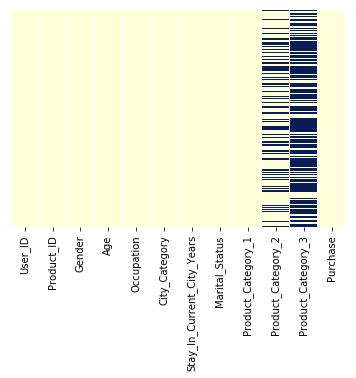

In [6]:
sns.heatmap(data=dataset.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In our dataset we have lot of missing values for the features <b>Product_Category_2</b> and <b>Product_Category_3 </b>. Let's look further into the dataset

In [7]:
def percentMissing():
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return missing_data[missing_data['Total']>0]

,Total,Percent
Product_Category_3,373299,0.694410
Product_Category_2,166987,0.310629
Stay_In_Current_City_Years,10,0.000019
Gender,9,0.000017
City_Category,4,0.000007
Product_Category_1,2,0.000004
Marital_Status,2,0.000004
Age,1,0.000002


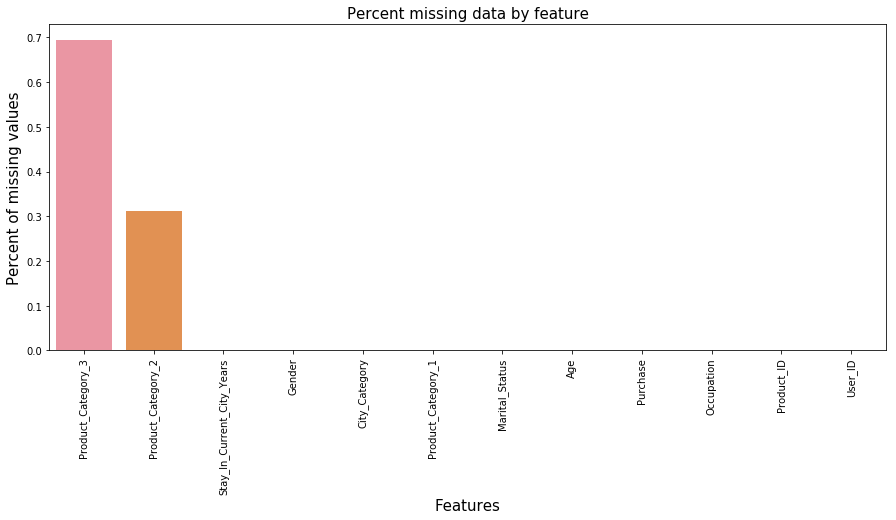

In [8]:
percentMissing()

We can see that, <br><b> 69% of the Product_Category_3 </b> is missing followed by <b>Product_Category_2 with a value of 31%</b>.<br> 
Apart from that <b>Stay_In_Current_City_Years,Gender and City_Category</b> have a <b>10,9 and 4</b> missing values respectively.

### FILL MISSING VALUES

In [9]:
# import Imputer from sklearn library to fill the missing values by taking mean values 
from sklearn.preprocessing import Imputer

In [10]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(dataset.iloc[:,8:11].values)
dataset.iloc[:,8:11] = imputer.transform(dataset.iloc[:,8:11].values)

/home/amald/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Total,Percent
Stay_In_Current_City_Years,10,0.000019
Gender,9,0.000017
City_Category,4,0.000007
Marital_Status,2,0.000004
Age,1,0.000002


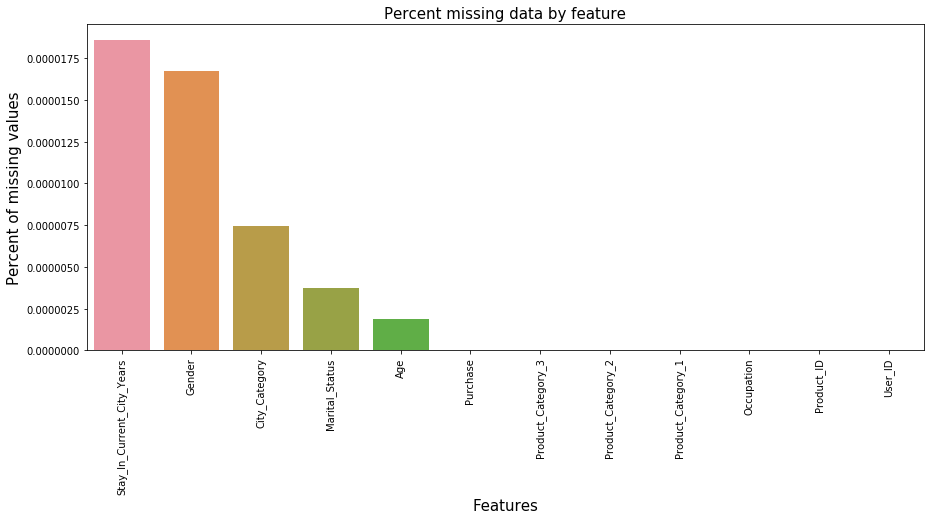

In [11]:
percentMissing()

Since rest of the missing value percent is less than 5% of the total dataset, we can just drop those rows as it will not make any difference

In [12]:
# Will drop all rows that have any missing values.
dataset.dropna(inplace=True)

,Total,Percent


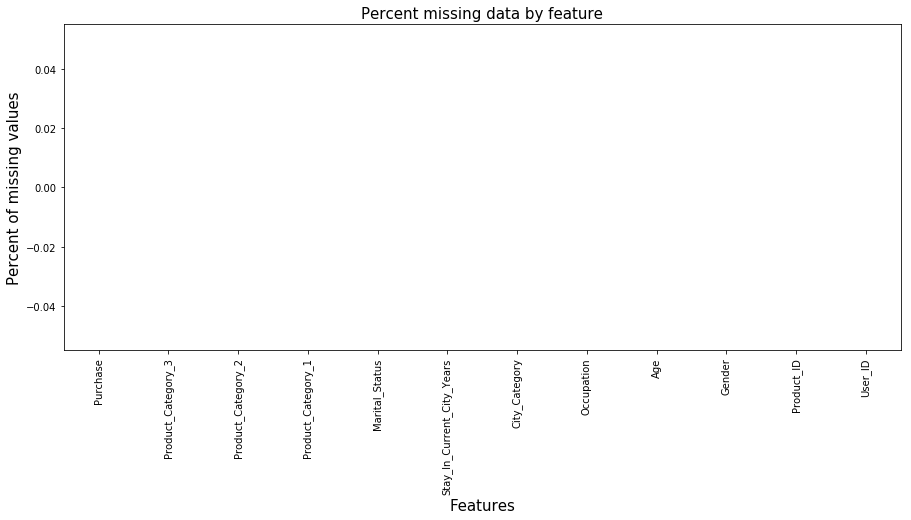

In [13]:
percentMissing()

Now we have fixed all the missing values in our dataset

### CLEAN THE DATA

We have some special characters like ( + ) in the columns like <b> Age , Stay_In_Current_City_Years.</b> This has to be removed before feeding the data to ML algorithm.

In [14]:
dataset['Age']=(dataset['Age'].str.strip('+'))
dataset['Stay_In_Current_City_Years'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [15]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,9.84216,12.66984,8370
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.00000,12.66984,1057
4,1000002,P00285442,M,55,16,C,4,0.0,8.0,9.84216,12.66984,7969
5,1000003,P00193542,M,26-35,15,A,3,0.0,1.0,2.00000,12.66984,15227
6,1000004,P00184942,M,46-50,7,B,2,1.0,1.0,8.00000,17.00000,19215


As can be seen, we have managed to clean the columns to removed the '+' sign from the two columns.At this stage, I will exploratory data analysis by visualising the data.

### EDA

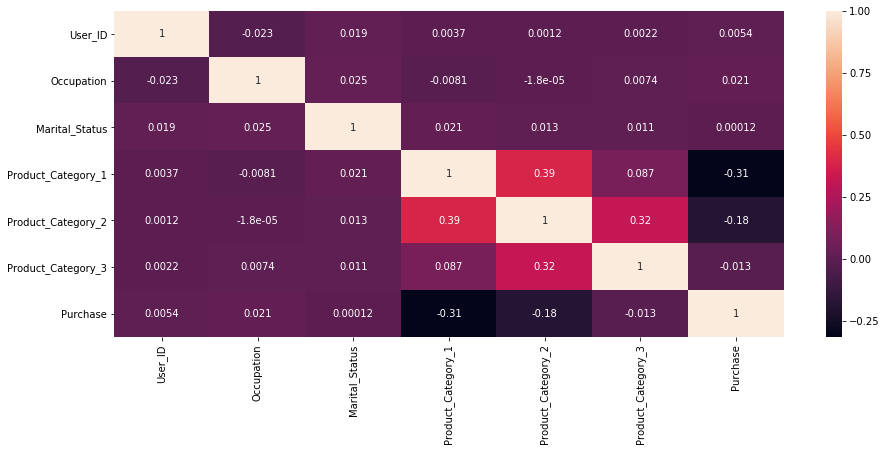

In [16]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(dataset.corr(),annot=True)

1 - Summarize the dataset using tables and graphs that compare customers’ purchases grouped by different features.

#### 1. Purchase Vs Occupation

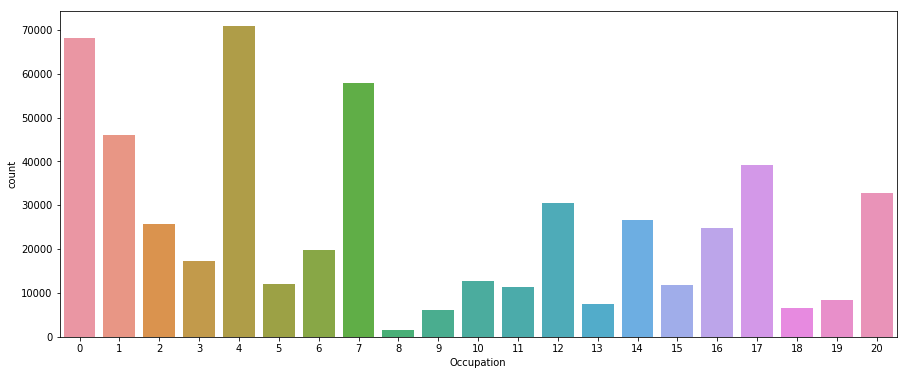

In [17]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(dataset.Occupation)

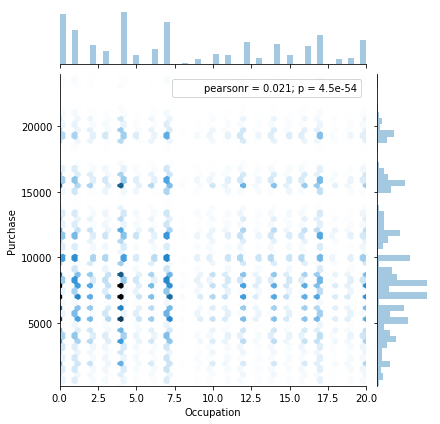

In [18]:
sns.jointplot(x='Occupation',y='Purchase',data=dataset, kind='hex')

Findings :- <br>
   <pre> 1 - The most of the purchase is done between 5000-10000.</pre>
   <pre> 2 - Customers with occupation 0, 4 and 7 makes highest purchases </pre>


#### 2 - Gender Vs Occupation

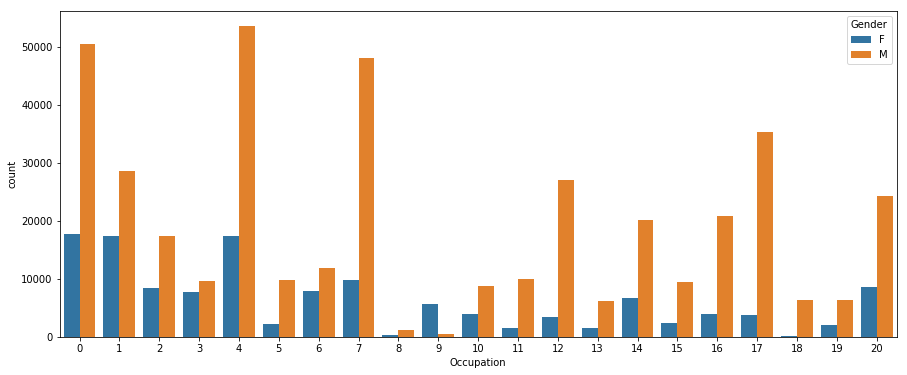

In [19]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(dataset.Occupation, hue=dataset.Gender)

Findings :- <br>
   <pre> 1 - Males are more interested in Black Friday deal </pre>

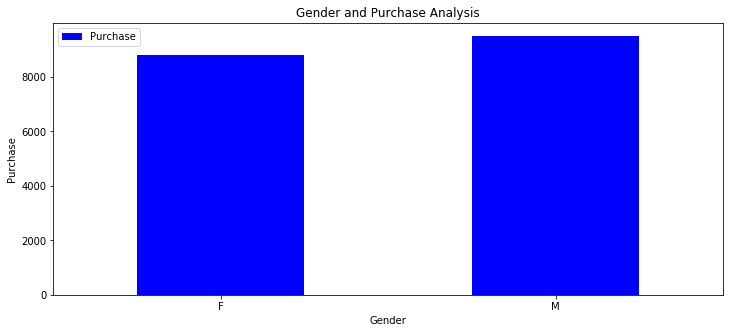

In [32]:
Occupation_pivot = \
dataset.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### 3 - Age Vs Purchase

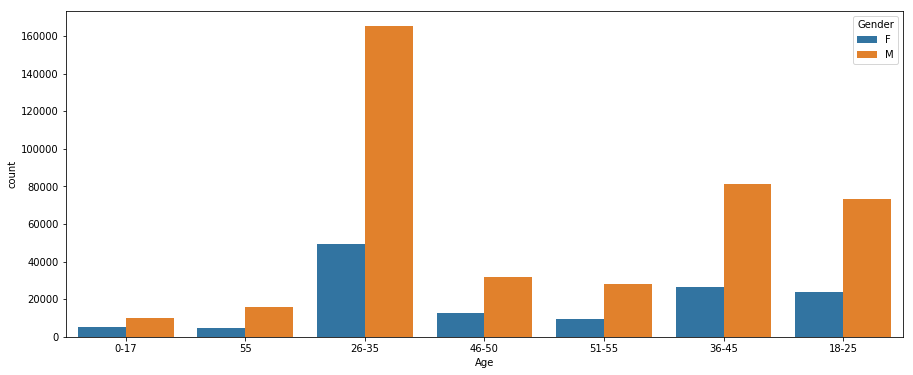

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(dataset.Age, hue=dataset.Gender)

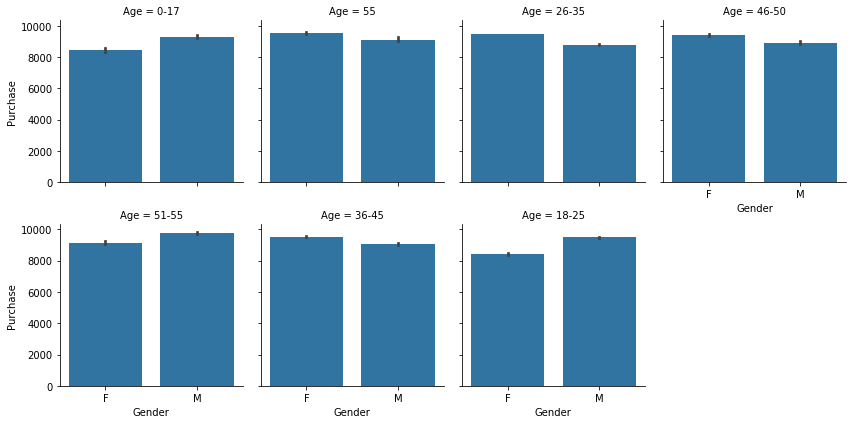

In [27]:
g = sns.FacetGrid(dataset,col="Age",col_wrap=4, size=3)
g = g.map(sns.barplot, "Gender", "Purchase");

Findings :- <br>
   <pre> 1 - Overall Males are more intersted into this black friday deals regardless of age group. </pre>
   <pre> 2 - both genders are having almost equal amount spent even the no.of females are lower compared to males. </pre>

#### 4 - City_Category Vs Purchase

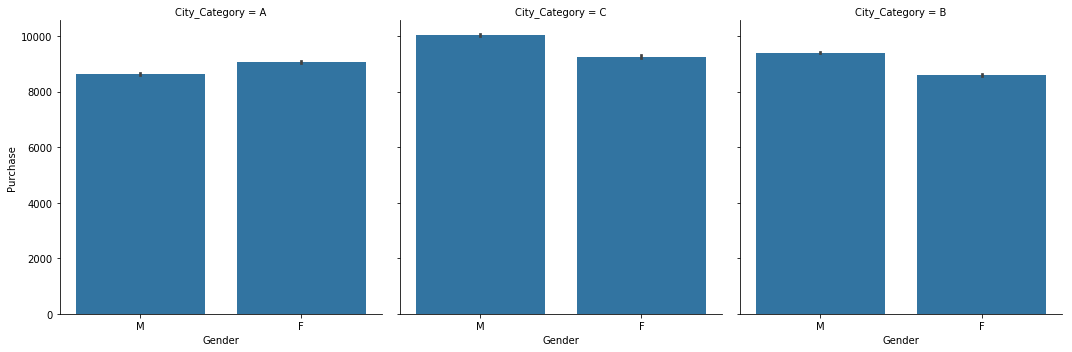

In [28]:
g = sns.FacetGrid(dataset,col="City_Category",size=5)
g.map(sns.barplot, "Gender", "Purchase");

Findings :- <br>
   <pre> 1 - Purchase amount is more in city C for Males and city A for Females. </pre>
   <pre> 2 - It will be good idea to do marketing based on above finding to boost the sales next time. </pre>

#### 5 - City_Category Vs Purchase Vs Age

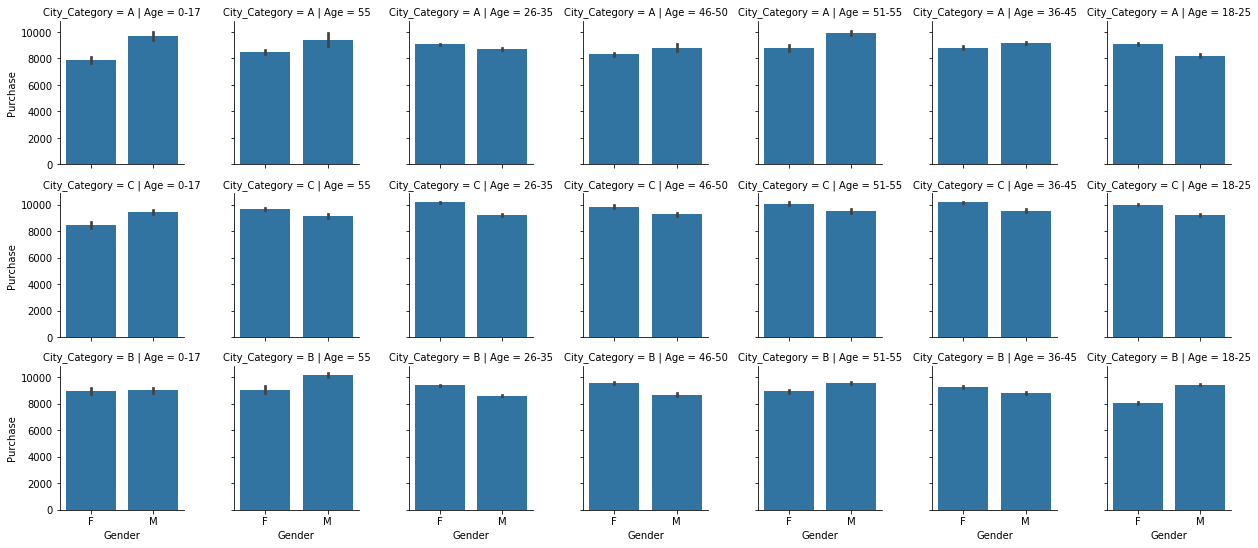

In [29]:
g = sns.FacetGrid(dataset,col="Age",row="City_Category",gridspec_kws={"wspace":0.4}, size=3)
g.map(sns.barplot, "Gender", "Purchase");

Findings :- <br>
   <pre> 1 - Males from City A spent more money during this day regardless of age group. </pre>
   <pre> 2 - Females from City C spent more money during this day regardless of age group. </pre>
   <pre> 3 - Males & Females from City B almost spent equal money during this day regardless of age group. </pre>
   <pre> 4 - Females in two age groups that can be identified with higher purchase, 26-35 and 18-25 in CITY A. </pre>

#### 6 - Marital Status Vs Purchase


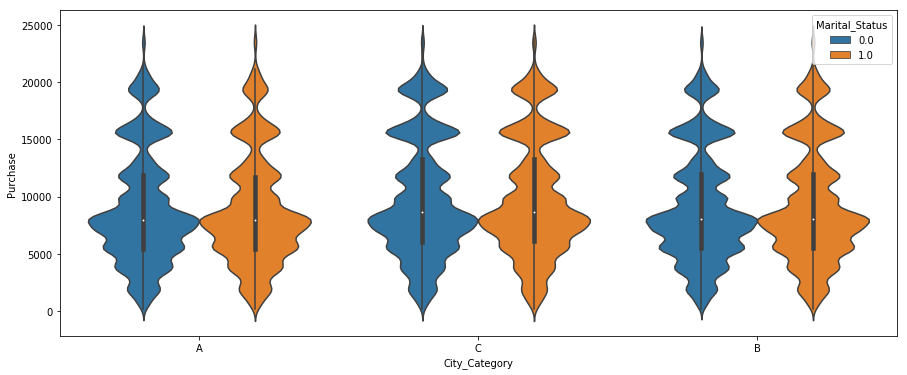

In [30]:
f, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',data=dataset)

Findings :- <br>

<pre>1 -Ananlysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.</pre>

#### 7. Purchase Vs Product_Category_1


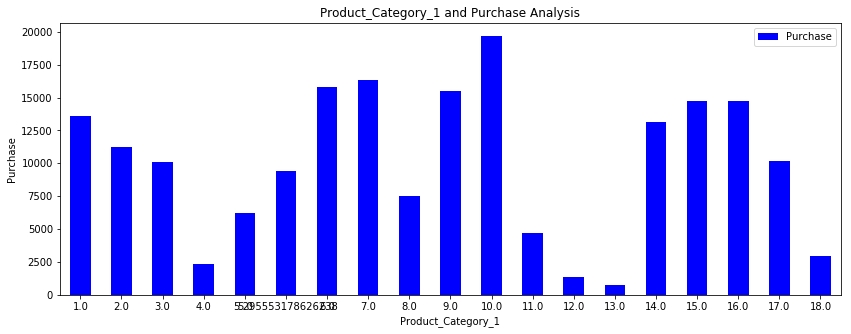

In [35]:
Occupation_pivot = \
dataset.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(14,5))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

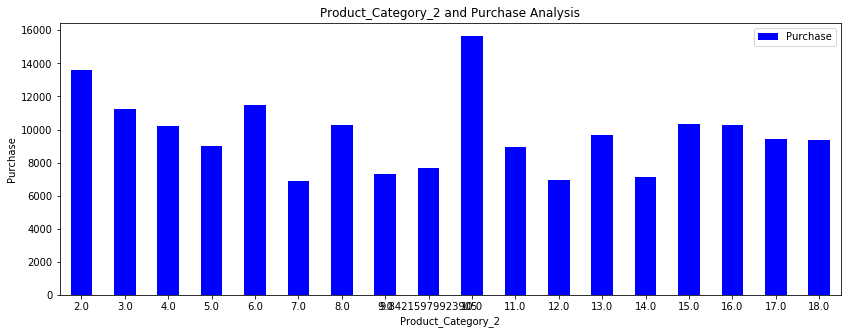

In [36]:
Occupation_pivot = \
dataset.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(14,5))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

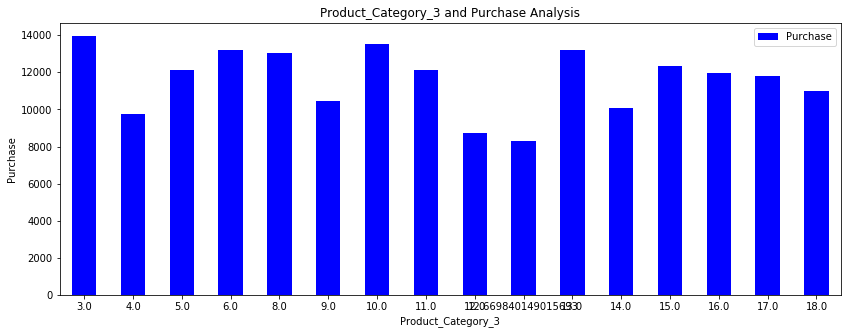

In [37]:
Occupation_pivot = \
dataset.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(14,5))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### 8. Purchase Vs Stay_In_Current_City_Years

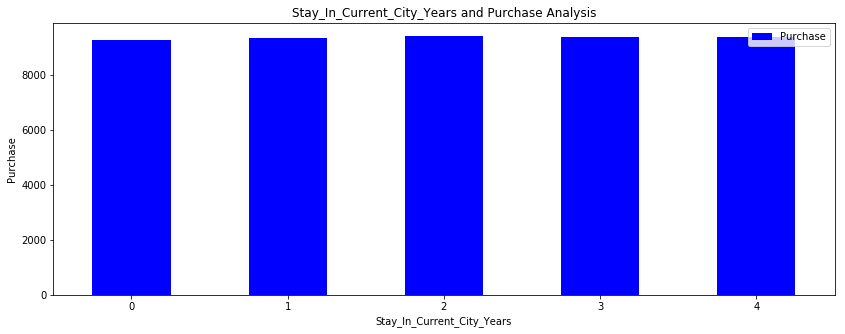

In [39]:
Occupation_pivot = \
dataset.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(14,5))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [56]:
!pip install pandasql
import pandasql as ps

In [209]:
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='0-17' """
p1 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='55' """
p2 = round(ps.sqldf(q1, locals())/1000000,2)
q3 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='26-35' """
p3 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='46-50' """
p4 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='51-55' """
p5 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='36-45' """
p6 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='18-25' """
p7 = round(ps.sqldf(q1, locals())/1000000,2)

In [216]:
purchase = pd.concat([p1, p2,p3,p4,p5,p6,p7], axis=0)
purchase.reset_index(inplace=True)
purchase.drop('index',inplace=True,axis=1)
age = dataset['Age'].unique()
df = pd.DataFrame(age,columns=['Age'])
purchasePerAge = pd.concat([df,purchase],axis=1)

In [219]:
purchasePerAge

,Age,TOTAL_PURCHASE
0,0-17,132.62
1,55,197.60
2,26-35,197.60
3,46-50,413.39
4,51-55,361.90
5,36-45,1010.63
6,18-25,901.64


Text(0,0.5,'Purchase in $M')

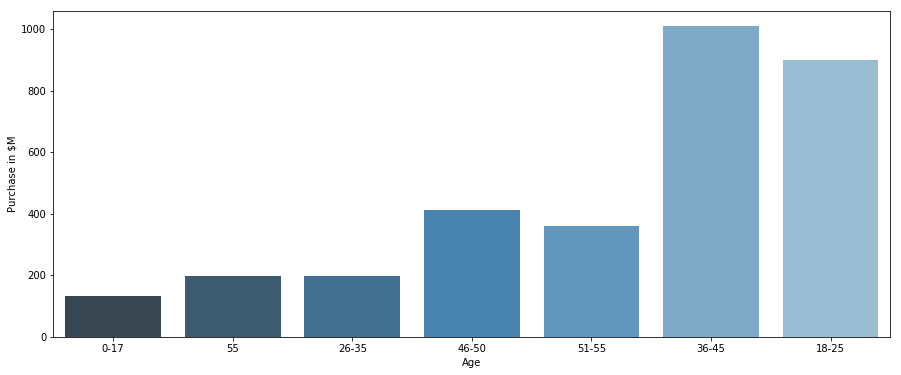

In [222]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Age',y='TOTAL_PURCHASE',data=purchasePerAge,palette="Blues_d")
ax.set_ylabel('Purchase in $M')

In [392]:
def getAgeGraph():
    f, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x='Age',y='TOTAL_PURCHASE',data=purchasePerAge,palette="Blues_d")
    ax.set_ylabel('Purchase in $M')

### FINANCIAL VALUE CALCULATION

In [29]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0.0,3.0,9.84216,12.66984,8370
3,F,0-17,10,A,2,0.0,12.0,14.00000,12.66984,1057
4,M,55,16,C,4,0.0,8.0,9.84216,12.66984,7969
5,M,26-35,15,A,3,0.0,1.0,2.00000,12.66984,15227
6,M,46-50,7,B,2,1.0,1.0,8.00000,17.00000,19215


Lets assume retail store “Rose” increase its customer's purchases by 10% than previous sale.

<pre> 1. Lets assume Rose has only 3 stores in total, 1 for each cities



In [227]:
total_sale = round(dataset['Purchase'].sum()/1000000,2)
"Total Sale of the store : $M " + str(total_sale)

'Total Sale of the store : $M 5017.45'

In [230]:
avg_sale = round(total_sale/3,2)
"Average Sale of the store : $M " + str(avg_sale)

'Average Sale of the store : $M 1672.48'

In [234]:
f1 = avg_sale * 0.1
f2 = round(avg_sale + f1,2)
"10 % increase in Average Sale of the store : $M " + str(f2)

'10 % increase in Average Sale of the store : $M 1839.73'

In [235]:
annual_impact = round(total_sale * 0.1,2)
"Annual impact : $M " + str(annual_impact)

'Annual impact : $M 501.75'

### Targeted Business Initiative

In [243]:
key_val = ['Total Sale ($M)','Number of Stores','Average Store Sale ($M)','10 % Increase in Avg Store Sale ($M)','Annual Impact ($M)']
data=[total_sale,no_stores,avg_sale,f2,annual_impact]
d = {'Key variable': key_val, 'Values': data}
df = pd.DataFrame(data=d)
df

,Key variable,Values
0,Total Sale ($M),5017.45
1,Number of Stores,3.00
2,Average Store Sale ($M),1672.48
3,10 % Increase in Avg Store Sale ($M),1839.73
4,Annual Impact ($M),501.75


### Use cases

In [244]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0.0,3.0,9.84216,12.66984,8370
3,F,0-17,10,A,2,0.0,12.0,14.00000,12.66984,1057
4,M,55,16,C,4,0.0,8.0,9.84216,12.66984,7969
5,M,26-35,15,A,3,0.0,1.0,2.00000,12.66984,15227
6,M,46-50,7,B,2,1.0,1.0,8.00000,17.00000,19215


Since the purpose of finding fincial value is to identify and allocate budget for marketing, lets consider :
<pre>1. Attract more Females by 10% -> Feature Gender </pre>
<pre>2. Attract more Males by 10% -> Feature Gender</pre>
<pre>3. Attract more teenegers by 10% -> Feature Age</pre>
<pre>4. Improve customer Satisfaction by 10% -> Feature City_Category : lets say customer experience in the store </pre>
<pre>5. Improve offer effectiveness by 10% - > Feature Stay_In_Current_City_Years: to attract old customers again </pre>
<pre>6. Improve offers specialy for couples by 10% -> Feature Marital_Status</pre>

10% may be too aggressive for a 9 to 12 month timeframe and you may want to amp that down to something around 3% to 5% for calculating Most likely estimate of financial value.

In [457]:
x = []
h1 = ['Decision','Present Value ($M)','High estimate ($M)', 'Low estimate ($M)', 'Most Likely Estimate ($M)']
d = {'Decision': h1}
head1 = pd.DataFrame(data=d)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Gender='F' """
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Attract more Females by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [458]:
decisions = pd.DataFrame([x],columns=h1)

In [459]:
x = []
h1 = ['Decision','Present Value ($M)','High estimate ($M)', 'Low estimate ($M)', 'Most Likely Estimate ($M)']
d = {'Decision': h1}
head1 = pd.DataFrame(data=d)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Gender='M' """
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Attract more males by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [460]:
y = pd.DataFrame([x],columns=h1)
z = decisions.append(y,ignore_index=True)
z

,Decision,Present Value ($M),High estimate ($M),Low estimate ($M),Most Likely Estimate ($M)
0,Attract more Females by 10%,1164.57,1281.03,1048.11,1222.80
1,Attract more males by 10%,3852.88,4238.17,3467.59,4045.52


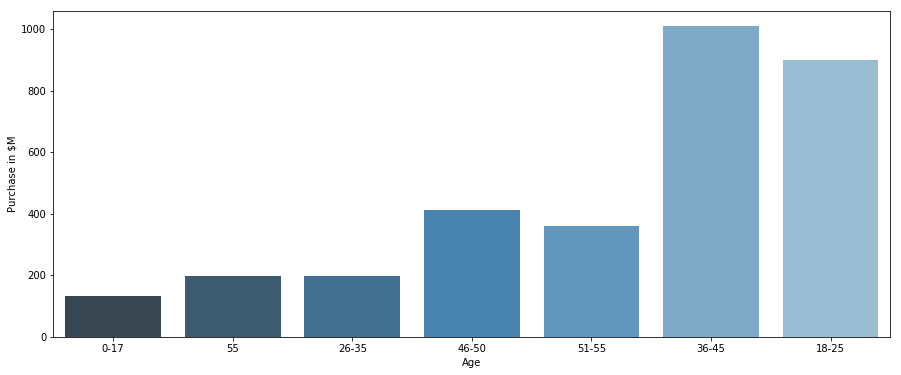

In [461]:
getAgeGraph()

Since customers from the age 0-17 has very low purchase value, we will concentrate on these customers to rise the value on next purchase.

In [462]:
x = []
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Age='0-17' """
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Attract more teenegers by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [463]:
y1 = pd.DataFrame([x],columns=h1)
z1 = z.append(y1,ignore_index=True)

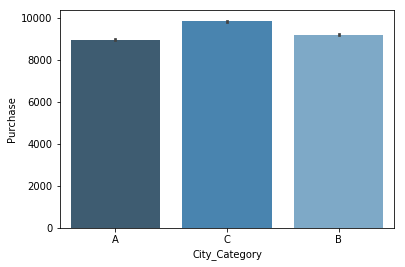

In [464]:
sns.barplot(x='City_Category',y='Purchase',data=dataset,palette="Blues_d")

In [465]:
x = []
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset"""
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Improve customer Satisfaction by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [466]:
y2 = pd.DataFrame([x],columns=h1)
z2 = z1.append(y2,ignore_index=True)
z2

,Decision,Present Value ($M),High estimate ($M),Low estimate ($M),Most Likely Estimate ($M)
0,Attract more Females by 10%,1164.57,1281.03,1048.11,1222.80
1,Attract more males by 10%,3852.88,4238.17,3467.59,4045.52
2,Attract more teenegers by 10%,132.62,145.88,119.36,139.25
3,Improve customer Satisfaction by 10%,5017.45,5519.19,4515.71,5268.32


In [476]:
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=0"""
p1 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=1"""
p2 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=2"""
p3 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=3"""
p3 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=4"""
p4 = round(ps.sqldf(q1, locals())/1000000,2)

In [489]:
purchase = pd.concat([p1, p2,p3,p4], axis=0)
purchase.reset_index(inplace=True)

In [490]:
purchase.drop('index',inplace=True,axis=1)
purchase

,TOTAL_PURCHASE
0,672.49
1,739.74
2,605.24
3,706.11


As expected newly relocated people are having less purchase value and hence it will be better to concentrate on those people.

In [484]:
x = []
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Stay_In_Current_City_Years=0"""
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Improve offer effectiveness by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [485]:
y3 = pd.DataFrame([x],columns=h1)
z3 = z2.append(y3,ignore_index=True)
z3

,Decision,Present Value ($M),High estimate ($M),Low estimate ($M),Most Likely Estimate ($M)
0,Attract more Females by 10%,1164.57,1281.03,1048.11,1222.80
1,Attract more males by 10%,3852.88,4238.17,3467.59,4045.52
2,Attract more teenegers by 10%,132.62,145.88,119.36,139.25
3,Improve customer Satisfaction by 10%,5017.45,5519.19,4515.71,5268.32
4,Improve offer effectiveness by 10%,672.49,739.74,605.24,706.11


In [495]:
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Marital_Status=0.0"""
p1 = round(ps.sqldf(q1, locals())/1000000,2)
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Marital_Status=1.0"""
p2 = round(ps.sqldf(q1, locals())/1000000,2)

In [496]:
purchase = pd.concat([p1, p2], axis=0)
purchase.reset_index(inplace=True)

In [497]:
purchase.drop('index',inplace=True,axis=1)
purchase

,TOTAL_PURCHASE
0,2966.19
1,2051.26


Looks like couples are having less purchase during the day. so we will have to add some sales foe them aswell.

In [498]:
x = []
q1 = """SELECT SUM(Purchase) AS TOTAL_PURCHASE FROM dataset WHERE Marital_Status=1.0"""
p1 = round(ps.sqldf(q1, locals())/1000000,2)
p2 = p1 + round((p1*0.1),2)
p3 = p1 - round((p1*0.1),2)
p4 = p1 + round((p1*0.05),2)
x.append('Improve offers specialy for couples by 10%')
x.append(p1.values[0][0])
x.append(p2.values[0][0])
x.append(p3.values[0][0])
x.append(p4.values[0][0])

In [500]:
y4 = pd.DataFrame([x],columns=h1)
z4 = z3.append(y4,ignore_index=True)
z4

,Decision,Present Value ($M),High estimate ($M),Low estimate ($M),Most Likely Estimate ($M)
0,Attract more Females by 10%,1164.57,1281.03,1048.11,1222.80
1,Attract more males by 10%,3852.88,4238.17,3467.59,4045.52
2,Attract more teenegers by 10%,132.62,145.88,119.36,139.25
3,Improve customer Satisfaction by 10%,5017.45,5519.19,4515.71,5268.32
4,Improve offer effectiveness by 10%,672.49,739.74,605.24,706.11
5,Improve offers specialy for couples by 10%,2051.26,2256.39,1846.13,2153.82


### Assess Value of Data Sources to Each Decision

Next, we need to determine a rough order of value for each data source with respect to how important each data source is to supporting the respective decisions. We will use Harvey Balls (with a value from 0 to 4) to value each of the data sources.

Lets sat our datasources are as follows : <br>
<pre>1. POS Transactions</pre>
<pre>2. Other Stores</pre>
<pre>3. Traffic</pre>
<pre>4. Weather</pre>

In [657]:
z4

,Decision,Present Value ($M),High estimate ($M),Low estimate ($M),Most Likely Estimate ($M)
0,Attract more Females by 10%,1164.57,1281.03,1048.11,1222.80
1,Attract more males by 10%,3852.88,4238.17,3467.59,4045.52
2,Attract more teenegers by 10%,132.62,145.88,119.36,139.25
3,Improve customer Satisfaction by 10%,5017.45,5519.19,4515.71,5268.32
4,Improve offer effectiveness by 10%,672.49,739.74,605.24,706.11
5,Improve offers specialy for couples by 10%,2051.26,2256.39,1846.13,2153.82


In [658]:
h3 = ['Attract more Females by 10%','Attract more Males by 10%','Attract more teenegers by 10%','Improve customer Satisfaction by 10%','Improve offer effectiveness by 10%','Improve offers specialy for couples by 10%']
h2=['Financial value','POS Transactions','Other Stores','Traffic','Weather']
datasource1 = z4.iloc[:,4]
data1=[datasource1[0],4,4,2,3]
data2=[datasource1[1],4,4,2,2]
data3=[datasource1[2],4,4,1,1]
data4=[datasource1[3],4,4,2,1]

In [659]:
d = {'Data Sources': h2,h3[0]:data1,h3[1]:data2,h3[2]:data3,h3[3]:data4,}
finalData = pd.DataFrame(data=d)

In [660]:
finalData = finalData[['Data Sources',h3[0],h3[1],h3[2],h3[3]]]

In [661]:
finalData

,Data Sources,Attract more Females by 10%,Attract more Males by 10%,Attract more teenegers by 10%,Improve customer Satisfaction by 10%
0,Financial value,1222.8,4045.52,139.25,5268.32
1,POS Transactions,4.0,4.00,4.00,4.00
2,Other Stores,4.0,4.00,4.00,4.00
3,Traffic,2.0,2.00,1.00,2.00
4,Weather,3.0,2.00,1.00,1.00


X/Y*Z <br>
Where:<br>
X is the relative rank of the data source  the use case a column<br>
      Y is the sum of the data source rankings for the use case in a column<br>
Z is the value of the use case in a column<br>


In [662]:
def getX(a,b):
    xx=[]
    xx.append('$'+str(finalData.iloc[:1,a:b].values[0][0]))
    for i in range(4):
        x = finalData.iloc[i+1:i+2,a:b] / finalData.iloc[1:,a:b].sum()
        y = finalData.iloc[:1,1:2]
        xx.append('$' +str(round(round(x.values[0][0],2) * y.values[0][0],2)))
    return xx

In [663]:
h3 = ['Attract more Females by 10%','Attract more Males by 10%','Attract more teenegers by 10%','Improve customer Satisfaction by 10%','Improve offer effectiveness by 10%','Improve offers specialy for couples by 10%']
h2=['Financial value ($M)','POS Transactions','Other Stores','Traffic','Weather']
data1=getX(1,2)
data2=getX(2,3)
data3=getX(3,4)
data4=getX(4,5)

In [664]:
d = {'Data Sources': h2,h3[0]:data1,h3[1]:data2,h3[2]:data3,h3[3]:data4,}
finalData = pd.DataFrame(data=d)
finalData = finalData[['Data Sources',h3[0],h3[1],h3[2],h3[3]]]

In [665]:
finalData

,Data Sources,Attract more Females by 10%,Attract more Males by 10%,Attract more teenegers by 10%,Improve customer Satisfaction by 10%
0,Financial value ($M),$1222.8,$4045.52,$139.25,$5268.32
1,POS Transactions,$379.07,$403.52,$489.12,$440.21
2,Other Stores,$379.07,$403.52,$489.12,$440.21
3,Traffic,$183.42,$207.88,$122.28,$220.1
4,Weather,$281.24,$207.88,$122.28,$110.05


In [765]:
def getAggr(a,b):
    sum=0
    a1 = float(finalData.iloc[a:b,1:].values[0][0].replace('$',''))
    a2 = float(finalData.iloc[a:b,1:].values[0][1].replace('$',''))
    a3 = float(finalData.iloc[a:b,1:].values[0][2].replace('$',''))
    a4 = float(finalData.iloc[a:b,1:].values[0][3].replace('$',''))
    sum = a1+a2+a3+a4
    return sum

In [775]:
aggSum = ['']
for i in range(4):
    aggSum.append('$'+str(round(getAggr(i+1,i+2),2)))

In [776]:
aggSum

['', '$1711.92', '$1711.92', '$733.68', '$721.45']

In [778]:
d = {'Data Sources': h2,h3[0]:data1,h3[1]:data2,h3[2]:data3,h3[3]:data4,'Value of Data across all use cases':aggSum}
finalData = pd.DataFrame(data=d)

In [780]:
finalData = finalData[['Data Sources',h3[0],h3[1],h3[2],h3[3],'Value of Data across all use cases']]

### Data Source Economic Value

In [781]:
finalData

,Data Sources,Attract more Females by 10%,Attract more Males by 10%,Attract more teenegers by 10%,Improve customer Satisfaction by 10%,Value of Data across all use cases
0,Financial value ($M),$1222.8,$4045.52,$139.25,$5268.32,
1,POS Transactions,$379.07,$403.52,$489.12,$440.21,$1711.92
2,Other Stores,$379.07,$403.52,$489.12,$440.21,$1711.92
3,Traffic,$183.42,$207.88,$122.28,$220.1,$733.68
4,Weather,$281.24,$207.88,$122.28,$110.05,$721.45


## Feature Engineering

In [40]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,9.84216,12.66984,8370
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.00000,12.66984,1057
4,1000002,P00285442,M,55,16,C,4,0.0,8.0,9.84216,12.66984,7969
5,1000003,P00193542,M,26-35,15,A,3,0.0,1.0,2.00000,12.66984,15227
6,1000004,P00184942,M,46-50,7,B,2,1.0,1.0,8.00000,17.00000,19215


Converting Gender to binary

In [41]:
gender_dict = {'F':0, 'M':1}
dataset['Gender'] = dataset['Gender'].apply(lambda line: gender_dict[line])
dataset['Gender'].value_counts()

1    405363
0    132191
Name: Gender, dtype: int64

Converting Age to numeric values

In [42]:
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55':6}
dataset['Age'] = dataset['Age'].apply(lambda line: age_dict[line])
dataset['Age'].value_counts()

2    214680
3    107497
1     97632
4     44524
5     37617
6     20900
0     14704
Name: Age, dtype: int64

Converting City_Category to binary

In [43]:
city_dict = {'A':0, 'B':1, 'C':2}
dataset['City_Category'] = dataset['City_Category'].apply(lambda line: city_dict[line])
dataset['City_Category'].value_counts()

1    226486
2    166437
0    144631
Name: City_Category, dtype: int64

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537554 entries, 0 to 537576
Data columns (total 16 columns):
User_ID                         537554 non-null int64
Product_ID                      537554 non-null object
Gender                          537554 non-null int64
Age                             537554 non-null int64
Occupation                      537554 non-null int64
City_Category                   537554 non-null int64
Marital_Status                  537554 non-null float64
Product_Category_1              537554 non-null float64
Product_Category_2              537554 non-null float64
Product_Category_3              537554 non-null float64
Purchase                        537554 non-null int64
Stay_In_Current_City_Years_0    537554 non-null uint8
Stay_In_Current_City_Years_1    537554 non-null uint8
Stay_In_Current_City_Years_2    537554 non-null uint8
Stay_In_Current_City_Years_3    537554 non-null uint8
Stay_In_Current_City_Years_4    537554 non-null uint8
dtypes: float64(

Converting Stay_In_Current_City_Years to binary

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
dataset['Stay_In_Current_City_Years'] = le.fit_transform(dataset['Stay_In_Current_City_Years'])

In [46]:
    
#Dummy Variables:
dataset = pd.get_dummies(dataset, columns=['Stay_In_Current_City_Years'])
dataset.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                  float64
Product_Category_1              float64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [794]:
dataset.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0.0,3.0,9.84216,12.66984,8370,0,0,1,0,0
3,0,0,10,0,0.0,12.0,14.00000,12.66984,1057,0,0,1,0,0
4,1,6,16,2,0.0,8.0,9.84216,12.66984,7969,0,0,0,0,1
5,1,2,15,0,0.0,1.0,2.00000,12.66984,15227,0,0,0,1,0
6,1,4,7,1,1.0,1.0,8.00000,17.00000,19215,0,0,1,0,0


Function to create count features

In [48]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
        count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

Creating all the features:

In [50]:
#data[“User_ID_Count”] = getCountVar(data, data, “User_ID”)
dataset['Age_Count'] =getCountVar(dataset, dataset, 'Age')
dataset['Occupation_Count'] =getCountVar(dataset, dataset, 'Occupation')
dataset['Product_Category_1_Count'] =getCountVar(dataset, dataset,'Product_Category_1')
dataset['Product_Category_2_Count'] =getCountVar(dataset, dataset, 'Product_Category_2')
dataset['Product_Category_3_Count'] =getCountVar(dataset, dataset,'Product_Category_3')
dataset['Product_ID_Count'] =getCountVar(dataset, dataset, 'Product_ID')

In [51]:
datasetset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537554 entries, 0 to 537576
Data columns (total 22 columns):
User_ID                         537554 non-null int64
Product_ID                      537554 non-null object
Gender                          537554 non-null int64
Age                             537554 non-null int64
Occupation                      537554 non-null int64
City_Category                   537554 non-null int64
Marital_Status                  537554 non-null float64
Product_Category_1              537554 non-null float64
Product_Category_2              537554 non-null float64
Product_Category_3              537554 non-null float64
Purchase                        537554 non-null int64
Stay_In_Current_City_Years_0    537554 non-null uint8
Stay_In_Current_City_Years_1    537554 non-null uint8
Stay_In_Current_City_Years_2    537554 non-null uint8
Stay_In_Current_City_Years_3    537554 non-null uint8
Stay_In_Current_City_Years_4    537554 non-null uint8
Age_Count       

In [52]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0.0,3.0,9.84216,12.66984,...,0,1,0,0,14704,12620,19848,166979,373282,221
3,1000001,P00085442,0,0,10,0,0.0,12.0,14.00000,12.66984,...,0,1,0,0,14704,12620,3874,54157,373282,334
4,1000002,P00285442,1,6,16,2,0.0,8.0,9.84216,12.66984,...,0,0,0,1,20900,24790,112127,166979,373282,200
5,1000003,P00193542,1,2,15,0,0.0,1.0,2.00000,12.66984,...,0,0,1,0,214680,11812,138346,48480,373282,606
6,1000004,P00184942,1,4,7,1,1.0,1.0,8.00000,17.00000,...,0,1,0,0,44524,57804,138346,63053,16449,1424


### Model Building

In [53]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0.0,3.0,9.84216,12.66984,...,0,1,0,0,14704,12620,19848,166979,373282,221
3,1000001,P00085442,0,0,10,0,0.0,12.0,14.00000,12.66984,...,0,1,0,0,14704,12620,3874,54157,373282,334
4,1000002,P00285442,1,6,16,2,0.0,8.0,9.84216,12.66984,...,0,0,0,1,20900,24790,112127,166979,373282,200
5,1000003,P00193542,1,2,15,0,0.0,1.0,2.00000,12.66984,...,0,0,1,0,214680,11812,138346,48480,373282,606
6,1000004,P00184942,1,4,7,1,1.0,1.0,8.00000,17.00000,...,0,1,0,0,44524,57804,138346,63053,16449,1424


In [54]:
dataset['City_Category'].unique()

array([0, 2, 1])

In [58]:
q1 = """SELECT * FROM dataset WHERE City_Category='0' """
city_A = ps.sqldf(q1, locals())
city_A.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0.0,3.0,9.84216,12.66984,...,0,1,0,0,14704,12620,19848,166979,373282,221
1,1000001,P00085442,0,0,10,0,0.0,12.0,14.00000,12.66984,...,0,1,0,0,14704,12620,3874,54157,373282,334
2,1000003,P00193542,1,2,15,0,0.0,1.0,2.00000,12.66984,...,0,0,1,0,214680,11812,138346,48480,373282,606
3,1000005,P00274942,1,2,20,0,1.0,8.0,9.84216,12.66984,...,1,0,0,0,214680,32906,112127,166979,373282,782
4,1000006,P00190242,0,5,9,0,0.0,4.0,5.00000,12.66984,...,1,0,0,0,37617,6152,11567,25874,373282,187


In [59]:
q1 = """SELECT * FROM dataset WHERE City_Category='1' """
city_B = ps.sqldf(q1, locals())
city_B.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000004,P00184942,1,4,7,1,1.0,1.000000,8.00000,17.00000,...,0,1,0,0,44524,57804,138346,63053,16449,1424
1,1000007,P00036842,1,3,1,1,1.0,1.000000,14.00000,16.00000,...,1,0,0,0,107497,45969,138346,54157,32147,865
2,1000010,P00085942,0,3,1,1,1.0,2.000000,9.84216,8.00000,...,0,0,0,1,107497,45969,23498,166979,12384,945
3,1000010,P00118742,0,3,1,1,1.0,5.295553,11.00000,12.66984,...,0,0,0,1,107497,45969,2,13944,373282,636
4,1000010,P00297942,0,3,1,1,1.0,8.000000,9.84216,12.66984,...,0,0,0,1,107497,45969,112127,166979,373282,178


In [60]:
q1 = """SELECT * FROM dataset WHERE City_Category='2' """
city_C = ps.sqldf(q1, locals())
city_C.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000002,P00285442,1,6,16,2,0.0,8.0,9.84216,12.66984,...,0,0,0,1,20900,24790,112127,166979,373282,200
1,1000008,P00249542,1,2,12,2,1.0,1.0,5.00000,15.00000,...,0,0,0,1,214680,30421,138346,25874,27611,778
2,1000008,P00220442,1,2,12,2,1.0,5.0,14.00000,12.66984,...,0,0,0,1,214680,30421,148583,54157,373282,1253
3,1000008,P00156442,1,2,12,2,1.0,8.0,9.84216,12.66984,...,0,0,0,1,214680,30421,112127,166979,373282,820
4,1000008,P00213742,1,2,12,2,1.0,8.0,9.84216,12.66984,...,0,0,0,1,214680,30421,112127,166979,373282,350


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [93]:
def splitData(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    return X_train, X_test, y_train, y_test

In [94]:
def makeData(data):
    X= data.drop(['Purchase','Product_ID','User_ID'],axis=1)
    y= data.Purchase
    
    return X,y

### Prediction Model For City A

In [95]:
X, y = makeData(city_A)
X_train, X_test, y_train, y_test = splitData(X,y)
X_train.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
133515,1,2,1,0,0.0,5.0,9.84216,12.66984,0,0,0,0,1,214680,45969,148583,166979,373282,388
93461,1,2,4,0,1.0,5.0,8.00000,12.66984,0,0,0,1,0,214680,70862,148583,63053,373282,260
132447,1,6,17,0,1.0,8.0,9.84216,12.66984,0,0,0,0,1,20900,39087,112127,166979,373282,36
44146,1,3,7,0,1.0,1.0,15.00000,16.00000,0,0,0,1,0,107497,57804,138346,37316,32147,1162
121599,1,2,0,0,0.0,1.0,13.00000,16.00000,0,0,0,1,0,214680,68120,138346,10369,32147,199


In [96]:
X_test.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
144500,0,2,1,0,0.0,1.0,2.00000,5.00000,0,0,0,1,0,214680,45969,138346,48480,16378,744
54762,0,2,0,0,1.0,5.0,9.84216,12.66984,0,1,0,0,0,214680,68120,148583,166979,373282,460
131608,0,1,4,0,0.0,3.0,5.00000,12.66984,0,0,1,0,0,97632,70862,19848,25874,373282,250
7072,1,2,4,0,1.0,5.0,9.84216,12.66984,0,0,1,0,0,214680,70862,148583,166979,373282,122
82569,1,1,12,0,1.0,1.0,5.00000,12.00000,0,1,0,0,0,97632,30421,138346,25874,9094,747


In [97]:
y_train.head()

133515     5375
93461      7021
132447     5859
44146     18956
121599    11933
Name: Purchase, dtype: int64

In [98]:
y_test.head()

144500     7887
54762      7011
131608    13701
7072       3585
82569     19679
Name: Purchase, dtype: int64

In [99]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [100]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2685
Max leaf nodes: 50  		 Mean Absolute Error:  2156
Max leaf nodes: 100  		 Mean Absolute Error:  2125
Max leaf nodes: 300  		 Mean Absolute Error:  2081
Max leaf nodes: 500  		 Mean Absolute Error:  2068
Max leaf nodes: 700  		 Mean Absolute Error:  2062
Max leaf nodes: 800  		 Mean Absolute Error:  2060
Max leaf nodes: 850  		 Mean Absolute Error:  2059


Fitting the model with the best number of n_estimators, to avoid underfitting and overfitting.


In [113]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0,warm_start=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=True)

In [114]:
y_pred = regressor.predict(X_test)

Lets us see what our prdicted results look like.

In [115]:
y_pred

array([11499.42154762,  6386.37916667, 11656.13543707, ...,
        8133.74785714,  6588.34830952, 12271.14942857])

In [116]:
predictors = X_train.columns
predictors

Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4', 'Age_Count', 'Occupation_Count',
       'Product_Category_1_Count', 'Product_Category_2_Count',
       'Product_Category_3_Count', 'Product_ID_Count'],
      dtype='object')

In [118]:
regressor.feature_importances_

array([0.01484976, 0.02259564, 0.04349905, 0.        , 0.01859336,
       0.4038719 , 0.01288783, 0.01007023, 0.0103562 , 0.01385111,
       0.01144737, 0.01155781, 0.01022988, 0.02077144, 0.04339676,
       0.20842774, 0.01292827, 0.00934212, 0.12132351])

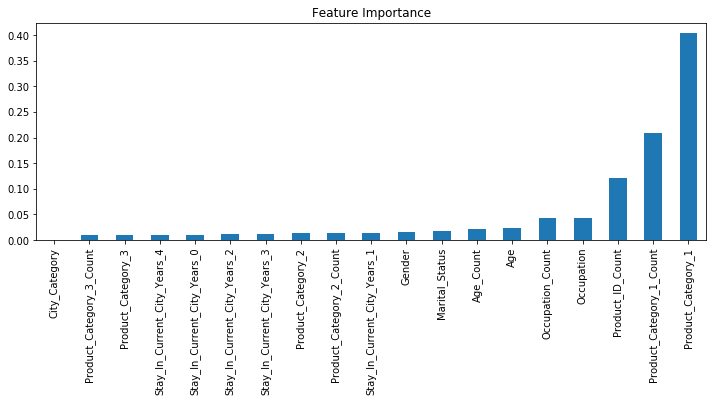

In [124]:
coef1 = pd.Series(regressor.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importance',figsize=(12, 4))

### Prediction Model For City B

In [125]:
X, y = makeData(city_B)
X_train, X_test, y_train, y_test = splitData(X,y)
X_train.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
144817,1,2,5,1,0.0,1.0,11.00000,12.66984,0,0,1,0,0,214680,11985,138346,13944,373282,926
149637,1,2,17,1,0.0,5.0,8.00000,12.66984,0,1,0,0,0,214680,39087,148583,63053,373282,414
49625,1,2,7,1,0.0,8.0,9.84216,12.66984,0,0,0,1,0,214680,57804,112127,166979,373282,782
97144,1,2,12,1,0.0,8.0,9.84216,12.66984,0,1,0,0,0,214680,30421,112127,166979,373282,207
146117,0,1,4,1,1.0,8.0,9.84216,12.66984,0,1,0,0,0,97632,70862,112127,166979,373282,87


In [126]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2776
Max leaf nodes: 50  		 Mean Absolute Error:  2104
Max leaf nodes: 100  		 Mean Absolute Error:  2075
Max leaf nodes: 300  		 Mean Absolute Error:  2035
Max leaf nodes: 500  		 Mean Absolute Error:  2023
Max leaf nodes: 700  		 Mean Absolute Error:  2019
Max leaf nodes: 800  		 Mean Absolute Error:  2017
Max leaf nodes: 850  		 Mean Absolute Error:  2016


In [127]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0,warm_start=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=True)

In [128]:
y_pred = regressor.predict(X_test)

In [129]:
y_pred

array([ 1463.33802721, 14271.93047619,  5365.49780952, ...,
       13279.07154762,  5961.94173129,  7285.61833333])

In [131]:
regressor.feature_importances_

array([0.01462502, 0.02241332, 0.04294584, 0.        , 0.0181897 ,
       0.43464879, 0.01075672, 0.00910962, 0.00920511, 0.01280351,
       0.01120365, 0.01093865, 0.01014157, 0.02102713, 0.04327432,
       0.20238854, 0.01020174, 0.007657  , 0.10846977])

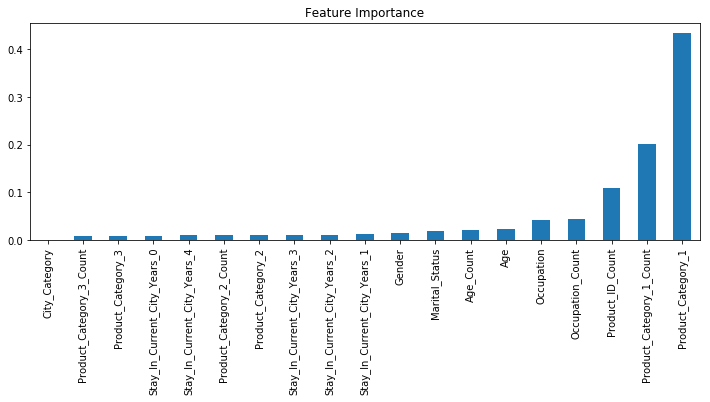

In [130]:
coef1 = pd.Series(regressor.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importance',figsize=(12, 4))

### Prediction Model For City B

In [132]:
X, y = makeData(city_C)
X_train, X_test, y_train, y_test = splitData(X,y)
X_train.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
16340,0,1,3,2,0.0,11.0,16.00000,12.66984,1,0,0,0,0,97632,17366,23960,42600,373282,389
2447,1,2,5,2,0.0,5.0,14.00000,12.66984,0,1,0,0,0,214680,11985,148583,54157,373282,319
120715,0,2,1,2,0.0,1.0,8.00000,17.00000,0,0,0,1,0,214680,45969,138346,63053,16449,303
155107,1,2,7,2,0.0,5.0,14.00000,12.66984,0,0,0,0,1,214680,57804,148583,54157,373282,670
142292,1,2,17,2,1.0,11.0,9.84216,12.66984,0,1,0,0,0,214680,39087,23960,166979,373282,178


In [133]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2787
Max leaf nodes: 50  		 Mean Absolute Error:  2110
Max leaf nodes: 100  		 Mean Absolute Error:  2086
Max leaf nodes: 300  		 Mean Absolute Error:  2063
Max leaf nodes: 500  		 Mean Absolute Error:  2055
Max leaf nodes: 700  		 Mean Absolute Error:  2052
Max leaf nodes: 800  		 Mean Absolute Error:  2051
Max leaf nodes: 850  		 Mean Absolute Error:  2051


In [134]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0,warm_start=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=True)

In [135]:
y_pred = regressor.predict(X_test)

In [136]:
y_pred

array([15856.56850057,  6506.6562517 , 16744.56220408, ...,
       12836.14019048, 18108.09175   ,  5752.62133673])

In [137]:
regressor.feature_importances_

array([0.01320435, 0.02321424, 0.04130505, 0.        , 0.01738276,
       0.46108345, 0.0095779 , 0.00872337, 0.00927233, 0.01216168,
       0.01066245, 0.01039297, 0.00978685, 0.02195333, 0.04054317,
       0.19934863, 0.01055217, 0.00657239, 0.09426291])

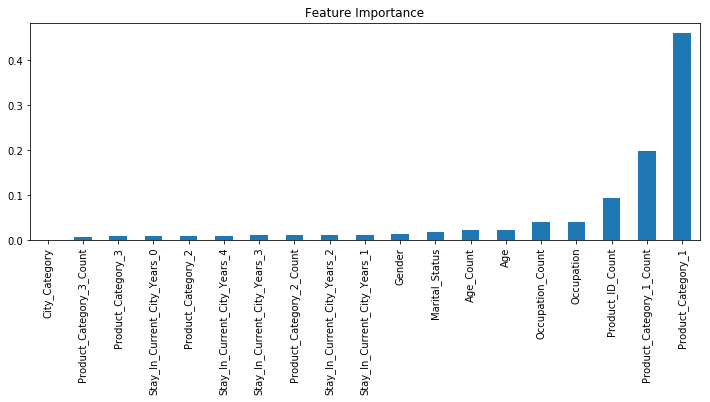

In [140]:
coef1 = pd.Series(regressor.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Feature Importance',figsize=(12, 4))

### Performance Mesure

In [141]:
print("Accuracy Score of Random Forests on train set",regressor.score(X_train,y_train)*100)

Accuracy Score of Random Forests on train set 93.14732657231282


In [143]:
print("Accuracy Score of Random Forests on test set",regressor.score(X_test,y_test)*100)

Accuracy Score of Random Forests on test set 67.96261908563856


In [153]:
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,y_pred)))

Mean Absolute Error : 2140.128588281578


In [149]:
from sklearn.metrics import mean_squared_error

In [152]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 2902
